<a href="https://colab.research.google.com/github/Shailendra079/CodeClause_project_Customer_Churn_rate_analysis/blob/main/Customer_churn_rate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv


In [ ]:
data= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data["SeniorCitizen"]= data["SeniorCitizen"].map({0: "No", 1:"Yes"})

In [ ]:
data.isnull().sum(axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

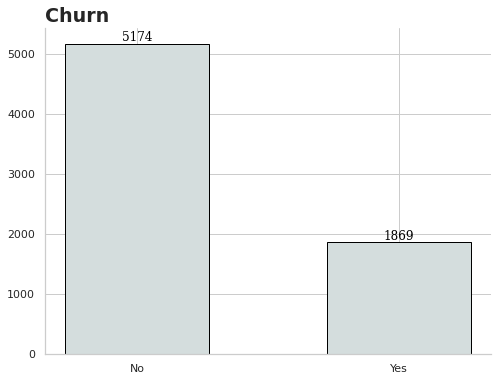

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8, 6))
data_temp = data['Churn'].value_counts().sort_index()
ax.bar(data_temp.index, data_temp,
          edgecolor='black', color='#d4dddd',
          width=0.55 )
ax.set_title('Churn', loc='left', fontsize=19, fontweight='bold')
for i in data_temp.index:
    ax.annotate(f"{data_temp[i]}", 
                   xy=(i, data_temp[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

In [ ]:
def CountPlot_Table (feature):
    sn.countplot(x=feature, hue="Churn", data=data, palette="Paired", edgecolor = 'Black', order=data[feature].value_counts().index)
    sn.despine()
    temp_table = pd.DataFrame(round(data.groupby(feature)['Churn'].value_counts(normalize = True),4))
    table = plt.table(cellText=temp_table.values,
          rowLabels=temp_table.index,
          colLabels=temp_table.columns,
          bbox=(1.5, 0,0.4 , 0.45))
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    plt.show()

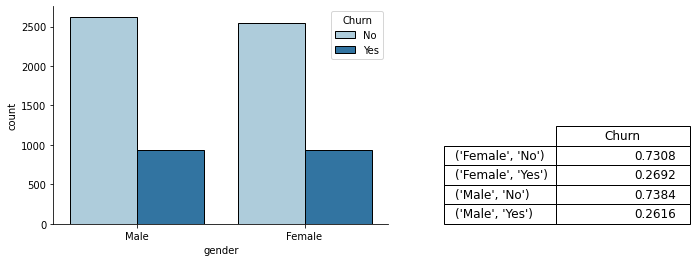

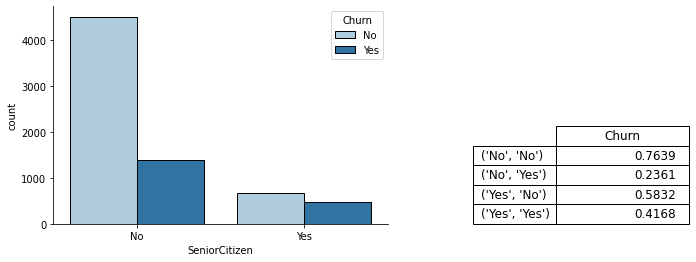

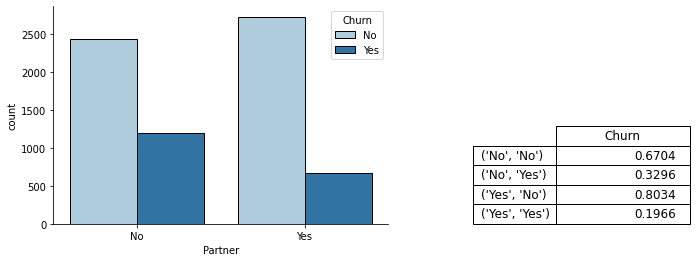

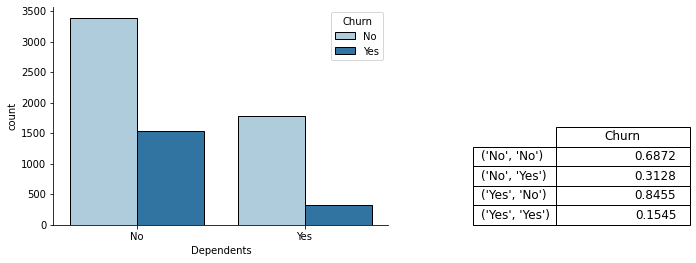

In [ ]:
demo_features = ['gender','SeniorCitizen','Partner','Dependents']
for feature in demo_features:
    CountPlot_Table(feature)

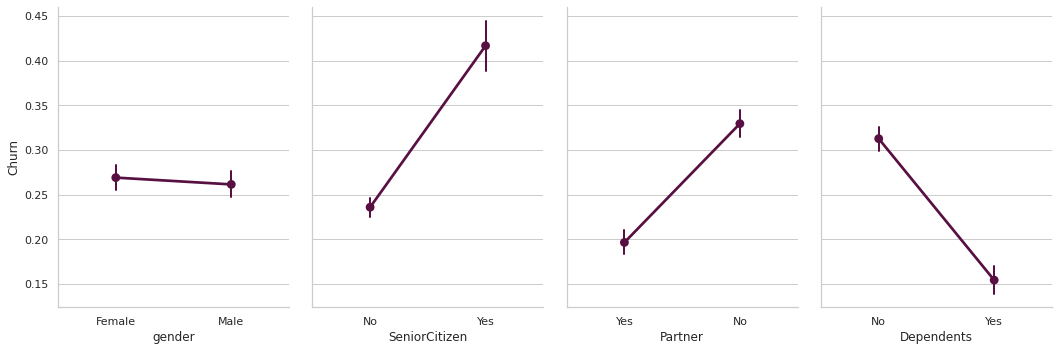

In [ ]:
df2 =data.copy()
df2["Churn"]= df2["Churn"].map({"No" : 0 , "Yes": 1})
sn.set_theme(style ='whitegrid')
g=sn.PairGrid(df2, y_vars = 'Churn',
             x_vars = ['gender','SeniorCitizen','Partner','Dependents'], height = 5, aspect =0.75)
g.map(sn.pointplot, scale = 1, errwidth =2, color = 'xkcd:plum')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.45, 0.92, 'Tenure vs Churn')

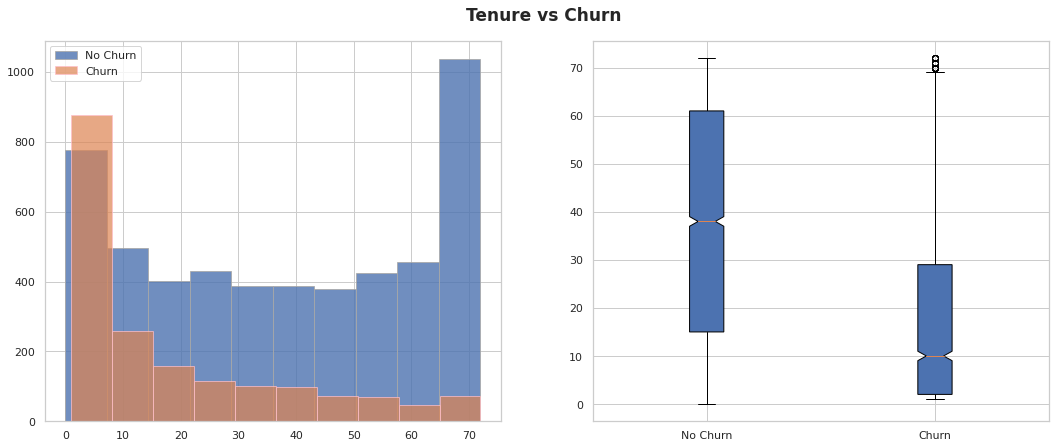

In [ ]:
Churn_0 = df2[df2["Churn"] == 0]
Churn_1 = df2[df2["Churn"] == 1]
fig, ax = plt.subplots(1, 2, figsize=(18, 7))
ax[0].hist(Churn_0.tenure, label='No Churn', alpha=.8, edgecolor='darkgrey')

ax[0].hist(Churn_1.tenure, label='Churn', alpha=0.7, edgecolor='pink')
ax[0].legend()  

columns = [Churn_0.tenure, Churn_1.tenure]
ax[1].boxplot(columns, notch=True, patch_artist=True)
plt.xticks([1, 2], ["No Churn", "Churn"])
fig.text(0.45, 0.92, 'Tenure vs Churn', fontsize=17, fontweight='bold')

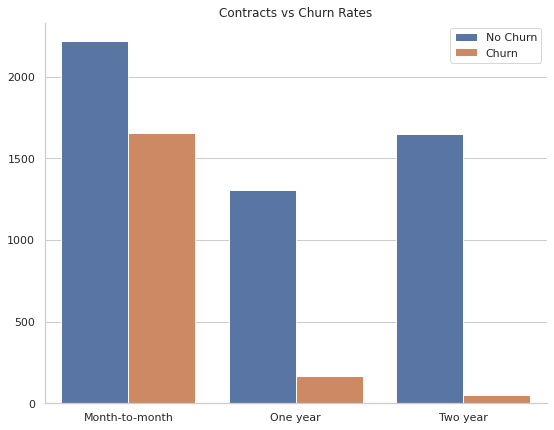

In [ ]:
plt.figure(figsize=(9,7))
ax = sn.countplot(x="Contract", hue="Churn", data=data).set(title='Contracts vs Churn Rates', xlabel=None, ylabel = None)
sn.despine()
plt.legend(title='', loc='upper right', labels=['No Churn', 'Churn'])
plt.show(g)

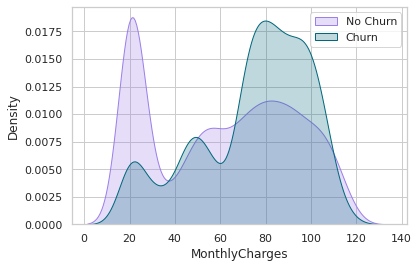

In [ ]:
ax = sn.kdeplot(Churn_0.MonthlyCharges, color="#9C7FE8", shade = True)
ax = sn.kdeplot(Churn_1.MonthlyCharges, color="#00677C", shade = True)
ax.legend(["No Churn","Churn"],loc='upper right')

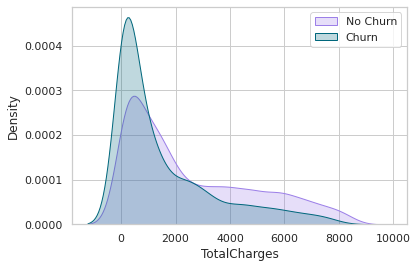

In [ ]:
pd.set_option('mode.chained_assignment', None)
Churn_0['TotalCharges'] = pd.to_numeric(Churn_0['TotalCharges'],errors = 'coerce')
Churn_1['TotalCharges'] = pd.to_numeric(Churn_1['TotalCharges'],errors = 'coerce')

ax = sn.kdeplot(Churn_0.TotalCharges, color="#9C7FE8", shade = True)
ax = sn.kdeplot(Churn_1.TotalCharges, color="#00677C", shade = True)
ax.legend(["No Churn","Churn"],loc='upper right')

In [ ]:
df_cluster = data.copy()
df_cluster = df_cluster.drop(['customerID', 'TotalCharges'], axis=1)
## Scale Tenure and Monthly Charges
scaler = StandardScaler()
df_cluster[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df_cluster[['tenure', 'MonthlyCharges']])

#Selecting all variables except tenure and Monthly Charges
df_cluster[df_cluster.columns[~df_cluster.columns.isin(['tenure','MonthlyCharges'])]] = encoder.fit_transform(df_cluster[df_cluster.columns[~df_cluster.columns.isin(['tenure','MonthlyCharges'])]])

In [ ]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 7))
    plt.plot(means, inertias, 'o-', color = 'black')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

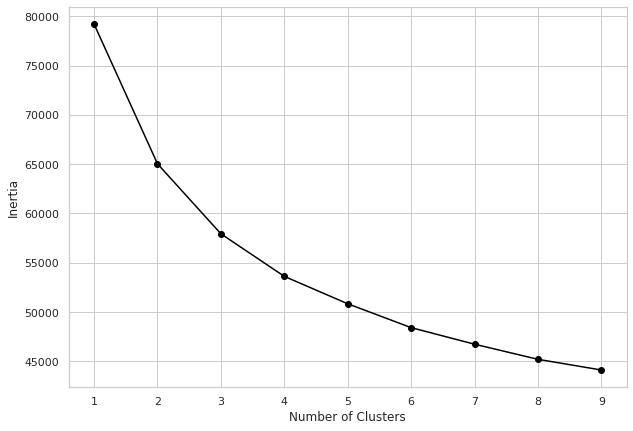

In [ ]:
optimise_k_means(df_cluster, 10)

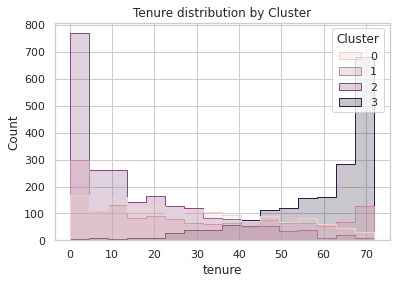

In [ ]:
data['Cluster'] = df_cluster['Cluster']
sn.histplot(data=data, x="tenure", hue="Cluster", element="step")
plt.title('Tenure distribution by Cluster')
plt.show()

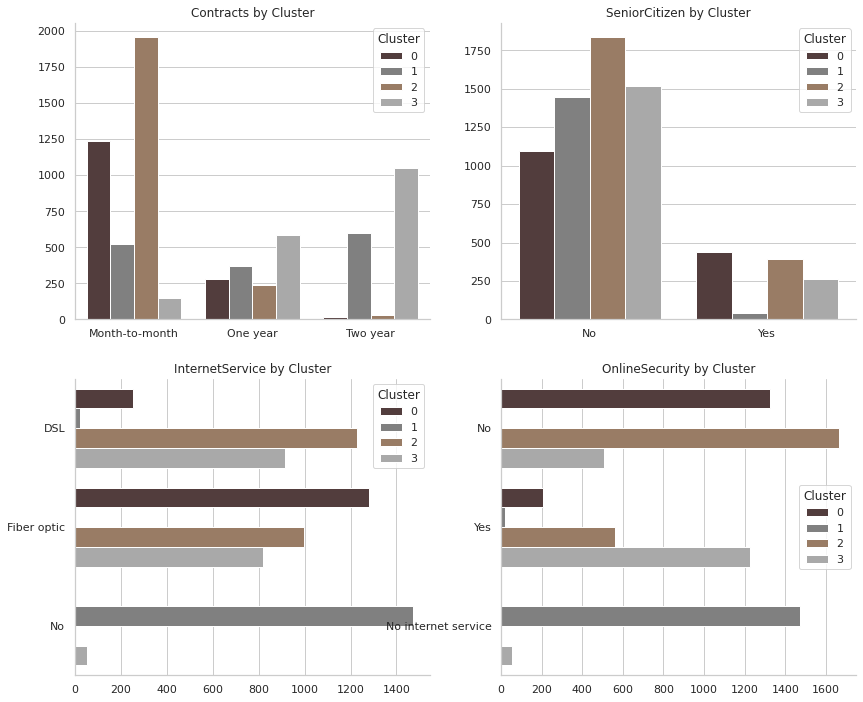

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
sn.despine()

# Gray for No Churn, highlight Churn!
colors = ["#553939", "#808080", "#A27B5C","#A9A9A9"]
# Set custom color palette
sn.set_palette(sn.color_palette(colors))
ax = sn.countplot(x="Contract", hue="Cluster", data=data, ax = axes[0,0]).set(title='Contracts by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(x="SeniorCitizen", hue="Cluster", data=data, ax = axes[0,1]).set(title='SeniorCitizen by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(y='InternetService', hue="Cluster", data=data,ax = axes[1,0]).set(title='InternetService by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(y='OnlineSecurity', hue="Cluster", data=data, ax = axes[1,1]).set(title='OnlineSecurity by Cluster', xlabel=None, ylabel = None)
sn.despine()


Conclusion: Cluster analysis is helpful for placing customers into segments using data, which allow businesses to decide which segment(s) to target form distinct marketing mixs that will satisfy the needs and wants of each targeted Cluster.